In [3]:
import os
for filenames in os.listdir('Rock-Paper-Scissors'):
    print(os.path.join('Rock-Paper-Scissors', filenames))

Rock-Paper-Scissors\test
Rock-Paper-Scissors\train
Rock-Paper-Scissors\validation


In [4]:
import numpy as np
import pandas as pd

import random

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

import matplotlib.pyplot as plt

In [5]:
base_dir = os.path.join('Rock-Paper-Scissors')
print('Base directory --> ', os.listdir(base_dir))

Base directory -->  ['test', 'train', 'validation']


In [8]:
# dataset path 정의

# train set
train_dir = os.path.join('Rock-Paper-Scissors/train/')
print("Train --> ", os.listdir(train_dir))

# test set
test_dir = os.path.join('Rock-Paper-Scissors/test/')
print("Test --> ", os.listdir(test_dir))

#validation set
validation_dir = os.path.join('Rock-Paper-Scissors/validation/')
print("Validation --> ", os.listdir(validation_dir)[:5])

Train -->  ['paper', 'rock', 'scissors']
Test -->  ['paper', 'rock', 'scissors']
Validation -->  ['paper-hires1.png', 'paper-hires2.png', 'paper1.png', 'paper2.png', 'paper3.png']


(-0.5, 299.5, 299.5, -0.5)

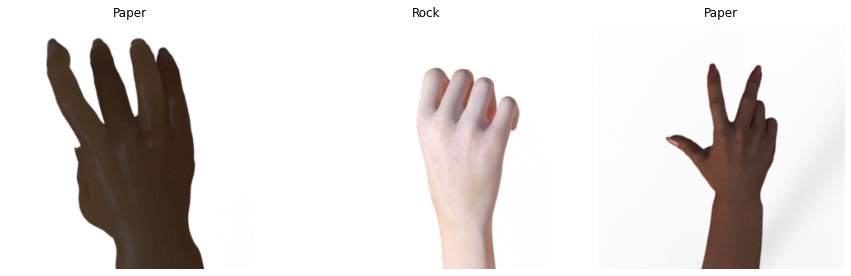

In [12]:
# 랜덤으로 이미지 보여주기
fig, ax = plt.subplots(1,3,figsize=(15,10))

sample_paper = random.choice(os.listdir(train_dir + 'paper')) # paper 파일 들어가서 랜덤으로 파일 하나 선택
image = load_img(train_dir + 'paper/' + sample_paper)
ax[0].imshow(image)
ax[0].set_title('Paper')
ax[0].axis('Off') #격자 넣지 말고

sample_rock = random.choice(os.listdir(train_dir + "rock"))
image = load_img(train_dir + 'rock/'+ sample_rock)
ax[1].imshow(image)
ax[1].set_title('Rock')
ax[1].axis('Off') #격자 넣지 말고

sample_scissor = random.choice(os.listdir(train_dir + "scissors"))
image = load_img(train_dir + "scissors/" + sample_scissor)
ax[2].imshow(image)
ax[2].set_title('Paper')
ax[2].axis('Off') #격자 넣지 말고

In [15]:
# 각각 사이즈 확인
print('paper counts: ',len(os.listdir(train_dir +'paper')))
print('rock counts: ',len(os.listdir(train_dir +'rock')))
print('scissor counts: ',len(os.listdir(train_dir +'scissors')))

paper counts:  840
rock counts:  840
scissor counts:  840


In [16]:
# CNN 모델 정의

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)), #input 층은 입력을 받는다!!!
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    
    tf.keras.layers.Dense(3, activation='softmax') #멀티 분류라서,,,
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [18]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [19]:
# callback function

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.95):
            print('\nReached >95% accuracy so cancelling training!')
            self.model.stop_training = True
            
callbacks = myCallback()           

In [20]:
# Training Generator with Image Augmentation

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    class_mode = 'categorical',
    batch_size = 20
)

Found 2520 images belonging to 3 classes.


In [21]:
840*3

2520

In [22]:
# Validation Generator

validation_datagen = ImageDataGenerator(rescale = 1./255)

validation_generator = validation_datagen.flow_from_directory(
    test_dir,
    target_size = (150,150),
    class_mode = 'categorical',
    batch_size = 20
)

Found 372 images belonging to 3 classes.


In [24]:
# Model Fitting

history = model.fit(
    train_generator,
    steps_per_epoch = np.ceil(2520/20), # 2520 이미지= 배치사이즈*steps
    epochs = 10,
    validation_data=validation_generator,
    validation_steps = np.ceil(372/20),
    callbacks=[callbacks],
    verbose = 2
)

Epoch 1/10
126/126 - 97s - loss: 0.8828 - accuracy: 0.5532 - val_loss: 0.5982 - val_accuracy: 0.6909
Epoch 2/10
126/126 - 81s - loss: 0.6214 - accuracy: 0.7278 - val_loss: 0.3975 - val_accuracy: 0.8145
Epoch 3/10
126/126 - 82s - loss: 0.4008 - accuracy: 0.8433 - val_loss: 0.1953 - val_accuracy: 0.8737
Epoch 4/10
126/126 - 80s - loss: 0.2389 - accuracy: 0.9206 - val_loss: 0.0589 - val_accuracy: 0.9812
Epoch 5/10
126/126 - 82s - loss: 0.1382 - accuracy: 0.9500 - val_loss: 0.0485 - val_accuracy: 0.9866
Epoch 6/10

Reached >95% accuracy so cancelling training!
126/126 - 81s - loss: 0.1283 - accuracy: 0.9548 - val_loss: 0.1370 - val_accuracy: 0.9328


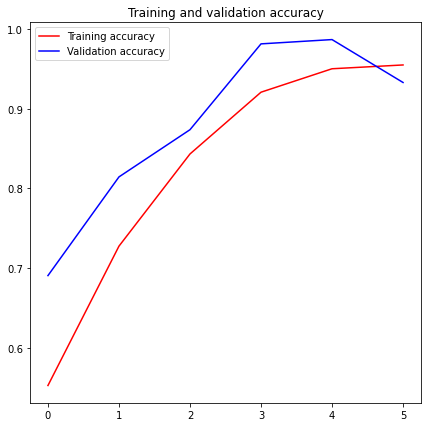

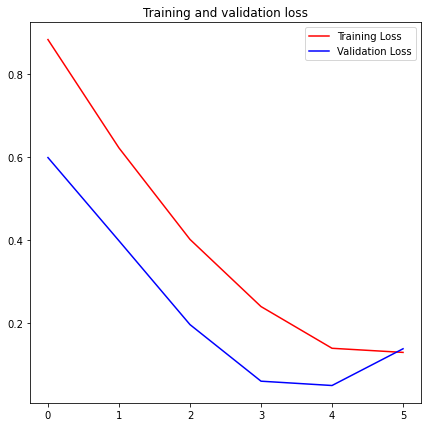

In [25]:
# visualizing the training

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(7,7))

plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure(figsize=(7,7))

plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [26]:
# Prepaing the Test Data
test_img = os.listdir(os.path.join(validation_dir))

test_df = pd.DataFrame({'Image':test_img})
test_df.head()

,Image
0,paper-hires1.png
1,paper-hires2.png
2,paper1.png
3,paper2.png
4,paper3.png


In [33]:
# Test Generator

test_gen = ImageDataGenerator(rescale=1./255)

test_generator = test_gen.flow_from_dataframe(
    test_df,
    validation_dir,
    x_col = 'Image',
    y_col = None,
    class_mode = None,
    target_size = (150,150),
    batch_size = 20,
    shuffle = False
)

Found 33 validated image filenames.


In [35]:
predict = model.predict(test_generator, steps = int(np.ceil(33/20)))

In [36]:
# Identifying the classes

label_map = dict((v,k) for k,v in train_generator.class_indices.items())
label_map

{0: 'paper', 1: 'rock', 2: 'scissors'}

In [38]:
len(predict)

33

In [60]:
test_df['Label'] =  np.argmax(predict, axis=-1) # 가장 마지막 축

#test_df['Label'] = test_df['Label'].replace(label_map)

In [62]:
test_df['Label'].map({0:'paper',1:'rock',2:'scissors'})

0        paper
1        paper
2        paper
3        paper
4     scissors
5        paper
6        paper
7        paper
8        paper
9        paper
10    scissors
11        rock
12        rock
13        rock
14        rock
15        rock
16        rock
17        rock
18        rock
19        rock
20        rock
21        rock
22    scissors
23    scissors
24    scissors
25    scissors
26    scissors
27    scissors
28    scissors
29    scissors
30    scissors
31    scissors
32    scissors
Name: Label, dtype: object

In [40]:
test_df.head()

,Image,Label
0,paper-hires1.png,paper
1,paper-hires2.png,paper
2,paper1.png,paper
3,paper2.png,paper
4,paper3.png,scissors


In [41]:
test_df.Label.value_counts()

scissors    13
rock        11
paper        9
Name: Label, dtype: int64

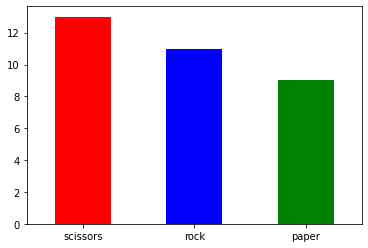

In [42]:
test_df.Label.value_counts().plot.bar(color = ['red','blue','green'])
plt.xticks(rotation=0)
plt.show()

In [46]:
# Results of testing the model with unseen images

v = random.randint(0,25)

sample_test = test_df.iloc[v:(v+18)].reset_index(drop=True)
sample_test.head()

#plt.figure(figsize=(12,24))

,Image,Label
0,rock8.png,rock
1,rock9.png,rock
2,scissors-hires1.png,scissors
3,scissors-hires2.png,scissors
4,scissors1.png,scissors


In [47]:
v

20

In [48]:
test_df.tail()

,Image,Label
28,scissors5.png,scissors
29,scissors6.png,scissors
30,scissors7.png,scissors
31,scissors8.png,scissors
32,scissors9.png,scissors


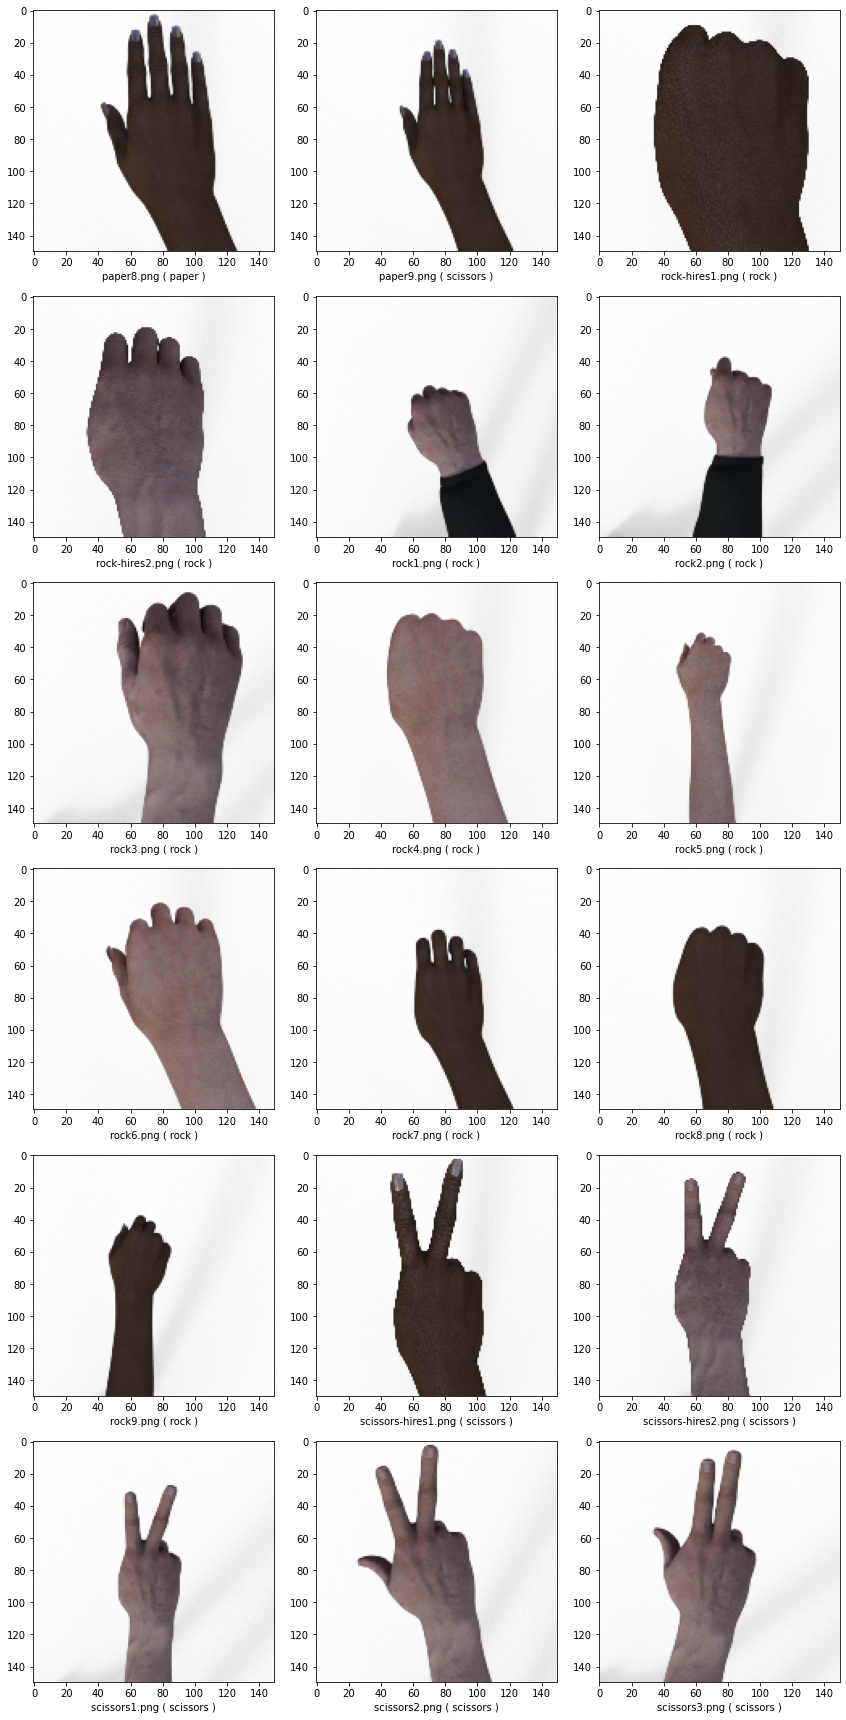

In [54]:
# Results of testing the model with unseen images

v = random.randint(0,25)

sample_test = test_df.iloc[v:(v+18)].reset_index(drop=True)
sample_test.head()

plt.figure(figsize=(12,24))
for index, row in sample_test.iterrows():
    filename = row['Image']
    category = row['Label']
    img = load_img(validation_dir + filename, target_size = (150,150))
    plt.subplot(6,3,index+1)
    plt.imshow(img)
    plt.xlabel(filename + ' ( ' + "{}".format(category) + ' )')

plt.tight_layout()
plt.show()

In [56]:
lis = []
for ind in test_df.index:
    if(test_df['Label'][ind] in test_df['Image'][ind]):
        lis.append(1)
    else:
        lis.append(0)

In [57]:
print("Accuracy of the model on test data is {:2f}".format((sum(lis)/len(lis))*100))

Accuracy of the model on test data is 93.939394
